Copyright © 2025 Technical University of Denmark

In [1]:
%load_ext autoreload
%autoreload 2

from lcg_plus.optimizer import GBS_optimizer
from lcg_plus.cost_functions import symm_effective_squeezing_gradients, symm_effective_squeezing, state_prep_GBS, gkp_squeezing, gkp_squeezing_gradients
from lcg_plus.plotting import plot_wigner_marginals
from lcg_plus.effective_sqz import effective_sqz
from lcg_plus.conversions import dB_to_Delta, Delta_to_dB
import numpy as np
import matplotlib.pyplot as plt

## Optimising a GBS circuit

In [11]:
opt = GBS_optimizer(4,
                    pattern = [3,3,3], 
                    inf = 1e-4, 
                    bs_arrange='Clements',
                    gradients = True,
                    costf_lattice = 's',
                    costf = symm_effective_squeezing_gradients,
                   )

np.random.seed(128)

opt.set_initial_guess()
print(opt.num_params)
print(opt.init_costf)

10
(1.1589172551274438, array([-1.63207063,  1.07080858, -0.94807069, -1.42883868,  4.56929553,
       -0.39891801, -7.37616939, 15.20135468, -1.17397784, -4.29145137]))


In [12]:
opt.run_global_optimisation(niter = 30)
print(opt.result.fun)
print(opt.result)

basinhopping step 0: f 0.523389
basinhopping step 1: f 0.463662 trial_f 0.463662 accepted 1  lowest_f 0.463662
found new global minimum on step 1 with function value 0.463662
basinhopping step 2: f 0.623295 trial_f 0.623295 accepted 1  lowest_f 0.463662
basinhopping step 3: f 0.549491 trial_f 0.549491 accepted 1  lowest_f 0.463662
basinhopping step 4: f 0.448965 trial_f 0.448965 accepted 1  lowest_f 0.448965
found new global minimum on step 4 with function value 0.448965
basinhopping step 5: f 0.448965 trial_f 0.791482 accepted 0  lowest_f 0.448965
basinhopping step 6: f 0.597149 trial_f 0.597149 accepted 1  lowest_f 0.448965
basinhopping step 7: f 0.452287 trial_f 0.452287 accepted 1  lowest_f 0.448965
basinhopping step 8: f 0.452287 trial_f 0.969817 accepted 0  lowest_f 0.448965
basinhopping step 9: f 0.452287 trial_f 1.33509 accepted 0  lowest_f 0.448965
basinhopping step 10: f 0.551417 trial_f 0.551417 accepted 1  lowest_f 0.448965
basinhopping step 11: f 1.33875 trial_f 1.33875 ac

Probability 0.00018689092405328863
Delta_x 0.40893892729573444
Delta_p 0.4099103671822573
symm Delta [dB] 7.756514217475795


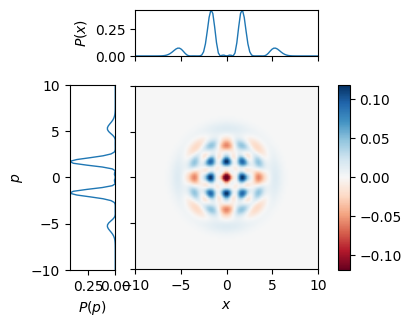

In [13]:
#Plot the output state

opt.set_initial_guess(params = opt.res_dict)
#pattern = (5,5,5)
pattern = opt.pattern

args = (opt.num_modes, 
        pattern, 
        opt.bs_arrange, 
        opt.setting, 
        opt.etas, 
        opt.nbars, 
        opt.pPNR,  
        False, #no gradients
        opt.inf,
        True) #fast rep


out = state_prep_GBS(opt.result.x, *args)
print('Probability', out.norm)
out.reduce_pure(np.sum(pattern))
Dx = effective_sqz(out, 'sx')
Dp = effective_sqz(out, 'sp')
print('Delta_x', Dx)
print('Delta_p', Dp)
print('symm Delta [dB]', Delta_to_dB(np.sqrt(0.5*(Dx**2+Dp**2))))
x = np.linspace(-10,10,100)
W = out.get_wigner_log(x,x)
plot_wigner_marginals(W.real,x,x)
plt.show()

## Other photon number patterns of optimal circuit


In [14]:
#check that the measurement probability sums to 1 of other patterns (up to a cutoff).
from itertools import product
prob = 0
cutoff = 12
patterns = list(product(range(cutoff), repeat=opt.num_modes-1))
print('pattern | prob | Delta_x | Delta_p | Delta_s')
for pattern in patterns: 
    
    args = (opt.result.x,
        opt.num_modes, 
        pattern, 
        opt.bs_arrange, 
        opt.setting, 
        opt.etas, 
        opt.nbars, 
        opt.pPNR, 
        False, #no gradients
        opt.inf, 
        True) #fast rep
    
    out = state_prep_GBS(*args)
    Delta_x=effective_sqz(out, 'sx')
    Delta_p=effective_sqz(out, 'sp')
    Delta_y = np.sqrt(0.5 * (Delta_x**2+Delta_p**2))
    if Delta_x < 0.5 or Delta_p < 0.5:
        print(pattern, out.norm, Delta_x, Delta_p, Delta_y)
    
    if out.norm > 0:
        prob += out.norm
   

print('total prob', prob) 

pattern | prob | Delta_x | Delta_p | Delta_s
(0, 4, 9) 0.00023978921867000573 1.974920849940176 0.4674850150561599 1.4350704865668595
(0, 5, 9) 0.00016163130163920634 1.8988869257476744 0.4842577914035649 1.3856906518611058
(0, 10, 11) 1.737372421733971e-05 1.524164254072403 0.47842609433838607 1.1295946620659925
(1, 3, 9) 0.00037120333551948835 0.5659971592753553 0.41413215221991906 0.49591240345955967
(1, 3, 11) 0.00021464502150428294 0.6337283161446927 0.4929857061106592 0.5677351869987507
(1, 4, 7) 0.000240161846809171 0.89741989426501 0.412874000894121 0.6985081986766298
(1, 7, 11) 7.726299334142881e-05 1.2440981238676574 0.4046613446521482 0.9250759281450117
(1, 8, 6) 9.753555809159599e-05 1.3326443212567658 0.42412962661919645 0.9888950467956762
(1, 8, 11) 4.251442222549741e-05 1.1206012795387505 0.36068694063009277 0.8324188539566427
(1, 9, 6) 4.341114179931076e-05 1.4454677645399423 0.4585181634325728 1.0722909970063346
(2, 4, 0) 0.004768592658016713 0.6805418619257464 0.49728

## Same optimisation, but without gradients

In [15]:
opt = GBS_optimizer(4, 
                    pattern = [3,3,3], 
                    inf = 1e-4, 
                    bs_arrange='Clements',
                    costf_lattice = 's',
                    costf = symm_effective_squeezing
                   )
np.random.seed(128)
opt.set_initial_guess()
print(opt.init_costf)

1.1589172546466702


In [16]:
opt.run_global_optimisation(niter = 50)
print(opt.result.fun)
print(opt.result)

basinhopping step 0: f 0.52996
basinhopping step 1: f 0.52996 trial_f 1.33773 accepted 0  lowest_f 0.52996
basinhopping step 2: f 0.718183 trial_f 0.718183 accepted 1  lowest_f 0.52996


/Users/s163967/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Git_Repos/bosonicplus/src/lcg_plus/effective_sqz.py:75: RuntimeWarning: invalid value encountered in sqrt
  D1 = np.sqrt(-2/np.abs(alpha)**2*np.log(np.abs(f1)))
/Users/s163967/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Git_Repos/bosonicplus/src/lcg_plus/effective_sqz.py:76: RuntimeWarning: invalid value encountered in sqrt
  D2 = np.sqrt(-2/np.abs(alpha)**2*np.log(np.abs(f2)))


basinhopping step 3: f 0.943359 trial_f 0.943359 accepted 1  lowest_f 0.52996
basinhopping step 4: f 1.33518 trial_f 1.33518 accepted 1  lowest_f 0.52996
basinhopping step 5: f 1.34395 trial_f 1.34395 accepted 1  lowest_f 0.52996
basinhopping step 6: f 0.923501 trial_f 0.923501 accepted 1  lowest_f 0.52996
basinhopping step 7: f 0.98267 trial_f 0.98267 accepted 1  lowest_f 0.52996
basinhopping step 8: f 0.699047 trial_f 0.699047 accepted 1  lowest_f 0.52996
basinhopping step 9: f 0.548726 trial_f 0.548726 accepted 1  lowest_f 0.52996
basinhopping step 10: f 0.914676 trial_f 0.914676 accepted 1  lowest_f 0.52996
basinhopping step 11: f 1.08594 trial_f 1.08594 accepted 1  lowest_f 0.52996
basinhopping step 12: f 0.744835 trial_f 0.744835 accepted 1  lowest_f 0.52996
basinhopping step 13: f 0.598076 trial_f 0.598076 accepted 1  lowest_f 0.52996
basinhopping step 14: f 0.587994 trial_f 0.587994 accepted 1  lowest_f 0.52996
basinhopping step 15: f 0.49182 trial_f 0.49182 accepted 1  lowest_

Probability 0.0003372708542254883
Delta_x 0.4209731279683616
Delta_p 0.4429502312035078


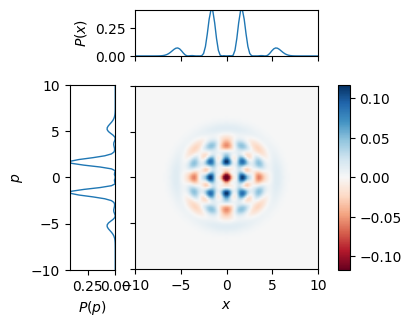

In [17]:
#Plot the output state
opt.set_initial_guess(params = opt.res_dict)

args = (opt.num_modes, 
        opt.pattern, 
        opt.bs_arrange, 
        opt.setting, 
        opt.etas, 
        opt.nbars, 
        opt.pPNR,  
        False, #no gradients
        opt.inf,
        True) #fast rep

out = state_prep_GBS(opt.result.x, *args)
print('Probability', out.norm)
out.reduce_pure(np.sum(opt.pattern))
print('Delta_x', effective_sqz(out, 'sx'))
print('Delta_p', effective_sqz(out, 'sp'))
x = np.linspace(-10,10,100)
W = out.get_wigner_log(x,x)
plot_wigner_marginals(W.real,x,x)
plt.show()